# iQuanta

### iQuanta is a Python module developed to formulate a novel framework for quantifying the information content in neural data using machine learning techniques.

One of the primary methods neurons employ to communicate is through the generation of action potentials, also known as spikes. These neural spikes can occur spontaneously or in response to external stimuli, carrying information about the stimuli they encode. However, accurately quantifying the information content within neural response patterns remains a challenging endeavor.

The  _**iQuanta**_ module is tailored for the quantification of information content in neural signals. The framework's methodology for quantifying information content is outlined in doi:10.1101/2023.12.04.569905. In summary, it introduces two measures: information detection and information differentiation. Information detection evaluates whether neural responses to a stimulus significantly differ from spontaneous neural activities. Conversely, information differentiation assesses whether neural responses to distinct stimuli significantly vary from one another.

The  _**iQuanta**_ module employs a range of supervised and unsupervised machine learning techniques, such as K-means clustering, K-nearest neighbors, and logistic classification algorithms. Information detection gauges how effectively the machine learning algorithm segregates evoked neural responses to a given stimulus from spontaneous neural activities. Similarly, information differentiation measures the algorithm's ability to distinguish evoked neural responses to different stimuli from each other.

In the unsupervised approach, the clustering algorithm's performance in predicting cluster labels was assessed using Normalized Mutual Information (NMI) as an external validation metric. NMI evaluates the resemblance between the predicted and true cluster labels, with reference to available true labels (see Strehl, A., & Ghosh, J. (2002). Cluster ensembles---a knowledge reuse framework for combining multiple partitions. _Journal of machine learning research, 3_(Dec), 583-617.). A score of zero indicates no similarity, while a score of one represents complete similarity between the predicted and true labels. In the supervised setting, the effectiveness of the clustering algorithm in predicting cluster labels was evaluated using accuracy scores.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
To install the  _**iQuanta**_, ensure the necessary Python libraries **numpy**, **torch**, **sklearn**, and **scipy** are installed. Please verify that the corresponding dependencies are present. To **install** the module from GitHub, run the following command:

In [1]:
!pip install git+ssh://git@github.com/fraziphy/iQuanta.git

  Cloning ssh://****@github.com/fraziphy/iQuanta.git to /tmp/pip-req-build-n8whdor5
  Running command git clone --filter=blob:none --quiet 'ssh://****@github.com/fraziphy/iQuanta.git' /tmp/pip-req-build-n8whdor5
  Resolved ssh://****@github.com/fraziphy/iQuanta.git to commit 4ebaae231fbcf13114acef707b24945c5ec35978
  Preparing metadata (setup.py) ... done
  Created wheel for iQuanta: filename=iQuanta-1.0.0-py3-none-any.whl size=11235 sha256=155f28951f792898ae20cde8af1c361fc716d8fa9208e9e05f55492ba59a6c7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-z3coo44k/wheels/4b/72/4a/f171c8b60cb9998c3353e4a31806bee89426917d5cb5eb64f3
Successfully built iQuanta


------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
To **uninstall** the module, please copy and execute the following command in a single cell:

```
!python -m pip uninstall iQuanta --yes
```
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

the  _**iQuanta**_  module accepts three arguments of "spontaneous_activities", "evoked_responses", and "algorithm". It returns the values of information detection and information differentiation

In [14]:
spontaneous_activities = data_raw["distribution"]["attention=1.5"]["S"]
evoked_responses = data_raw["distribution"]["attention=1.5"]["R"]

i_detection,i_differentiation = iquanta(spontaneous_activities,evoked_responses,"K_means_clustering")

print("Information Detection:")
print("")
print(i_detection)
print("")
print("")
print("Information Differentiation:")
print("")
print(i_differentiation)

Information Detection:

[[0.22663446 0.49137253 0.77050735 0.88360312]
 [0.04295828 0.04063811 0.03343809 0.04305765]]


Information Differentiation:

[0.27571494 0.01395472]


The first and second rows in "Information Detection" indicate the mean and 95% confidence interval for information detection obtained from the stratified k-fold sampling algorithm (with k set to 10). Each column represents the values corresponding to the respective stimuli.

Similarly, the first and second entries in "Information Differentiation" display the mean and 95% confidence interval for information differentiation derived from the stratified k-fold sampling algorithm (with k set to 10).

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
To process the new generated random data, simply copy and execute the following command in a single cell:
```
from scripts.process_data import Process_Data_Ditribution # To compute information content in data generated by Gaussian distribution

# To process raw data for Gaussian distribution
data_processed = {}
data_processed["distribution"] = Process_Data_Ditribution(data_raw["distribution"],"K_means_clustering")
```
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

To load pre-processed data, execute the following cell. This command loads the processed dataset saved as a dictionary in a file named "my_file.pkl" in the "data_processed_path" directory denoted in _**iQuanta.config**_ file.

In [17]:
from iQuanta.config import data_processed_path # The path to the processed data

# To load raw data
with open(data_processed_path, "rb") as fp:   #Unpickling
    data_processed = pickle.load(fp)

To visualize the results, import the following function:
```
from scripts.plot_figures import plot_information_content # To plot information content of data
```

This function plot_information_content(data) plots the information detection and information differentiation for the two attention levels. You can customize the plotting code within this function according to your specific data visualization needs in _**scripts.plot_figures**_.

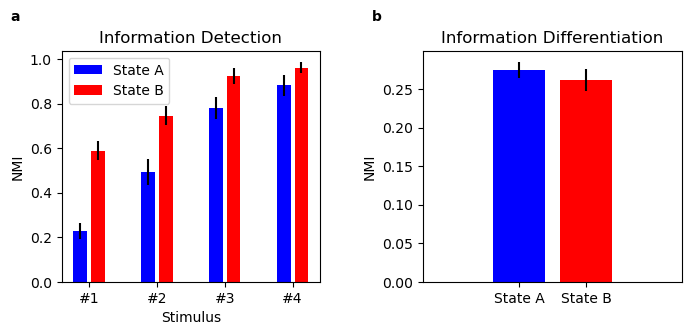

In [19]:
from scripts.plot_figures import plot_information_content # To plot information content of data
plot_information_content(data_processed["distribution"])

In an unsupervised framework for quantifying information content, NMI evaluates the similarity between the predicted and true cluster labels. The quantification of information content validates that despite comparable information differentiation, there is an improvement in information detection in state B compared to state A. These results underscore that neural responses contain more information in state B than in state A. It's worth noting that due to the random nature of the stratified k-fold algorithm, results regarding the exact absolute values for information content may vary each time the data is processed.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
As another illustration, let's generate artificial neural spike data to explore information content. These data involve simulating a neuron's activity as a Poisson process in response to four external stimuli, categorized into two behavioral conditions: low and high attention to external stimuli, labeled as states A and B, respectively. In state A, the neuron maintained a consistent firing rate during peristimulus intervals, following a Poisson process. When a stimulus was presented, the firing rate increased proportionally with the stimulus strength, returning to its baseline level after the stimulus offset. The main difference between the two states lies in state B, where the evoked firing rate was augmented by a constant value due to heightened attention to stimuli.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
To generate a new set of random data, simply copy and execute the following command in a single cell:
```
from scripts.generate_raw_data import Generate_Raw_Spiking_Data # The function to generate spiking data

# To generate raw data for Poisson spiking neuron
data_raw["spiking"] = Generate_Raw_Spiking_Data(n_neurons,n_inputs,n_trials,attentions)
```
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

To visualize the data, import the following function:
```
from scripts.plot_figures import plot_spiking_data # To plot distribution of data generated by spiking data
```

This function plot_spiking_data(data) plots the raster plot of spiking data across 20 random trials and the peristimulus time histogram of the neural firing activities in response to four stimuli with increasing strength. You can customize the plotting code within this function according to your specific data visualization needs in _**scripts.plot_figures**_.

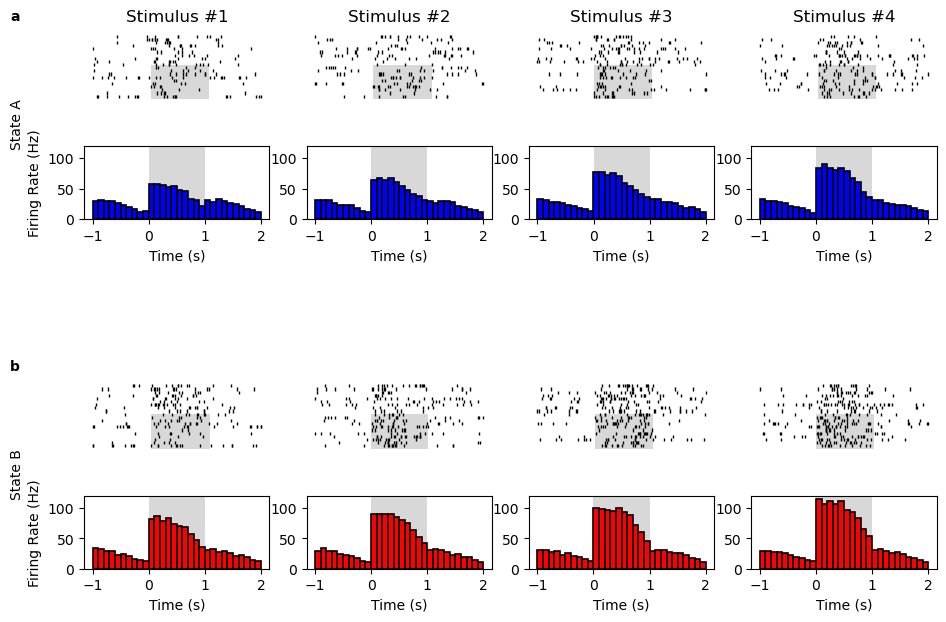

In [20]:
from scripts.plot_figures import plot_spiking_data # To plot distribution of data generated by spiking data
plot_spiking_data(data_raw["spiking"])

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
To process the new generated random data, simply copy and execute the following command in a single cell:
```
from scripts.process_data import Process_Data_Spiking #  To compute information content in data generated by spiking data

# To process raw data for Poisson spiking neuron
data_processed["spiking"] = Process_Data_Spiking(data_raw["spiking"],"K_means_clustering")
```
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

To visualize variation in information content from state A to B:

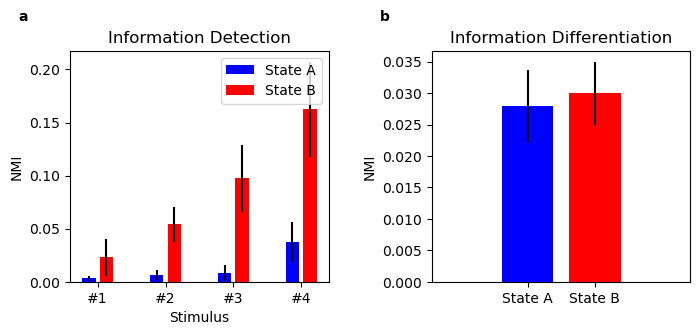

In [22]:
plot_information_content(data_processed["spiking"])

The results corroborate our previous findings: while information differentiation remains consistent across both states, information detection is notably enhanced in state B compared to state A. These results indicate that information content is heightened in state B compared to state A.